# 영상 데이터 이상 탐지
## fashion MNIST 이상 탐지
낙서가 되어있는 이미지데이터 분류

- 이상데이터를 탐지 할 때는 model.fit에 train_x, train_y를 넣어주는게 아니라 train_x를 두번 넣어줘야 함

 : 이상데이터가 너무 적어서 학습을 정상데이터로만 넣어 정상인것만 나올수있게 모델링하는것이 핵심




- 원본 이미지에와 각 픽셀을 확장한 이미지의 차이(뺄셈)로 이미지(diff)를 새로 만들어줌

 : Conv2DTranspose 이미지 확장시킨 후 convoltion 적용

```
1 2   (원본 이미지 배열)
3 4

||

1 1 2 2   (확장 이미지 배열)
1 1 2 2 
3 3 4 4 
3 3 4 4 
```
- 만들어준 diff이미지에서 튀는값이 낙서가 있는 부분으로 간주

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비

In [ ]:
import tensorflow as tf

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_x.shape)
print(test_x.shape)

(60000, 28, 28)
(10000, 28, 28)


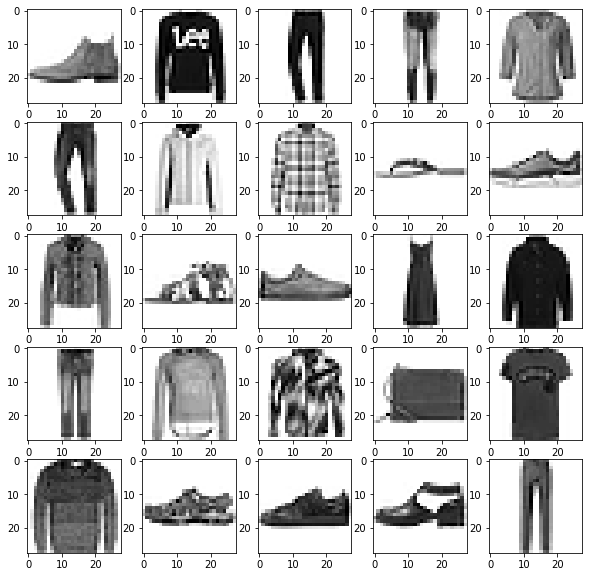

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test_x[i], cmap="binary")

plt.show()

# Test 데이터 생성
낙서가 있는 데이터 만들어줌

In [ ]:
# load_data()로 받은 것은 read only이다 카피해서 write가능하게 한다.
test_x = test_x.copy()
test_y = np.zeros_like(test_y)

In [ ]:
def draw_scar(image, size=2):
    x = np.random.randint(0+size, 27-size)
    y = np.random.randint(0+size, 27-size)
    image[y-size:y+size+1,x] = 255
    image[y,x-size:x+size+1] = 255

# 반절을 낙서를 그린다.
for i in range(int(len(test_x)/2)):    
    draw_scar(test_x[i], size=1)
    test_y[i] = 1

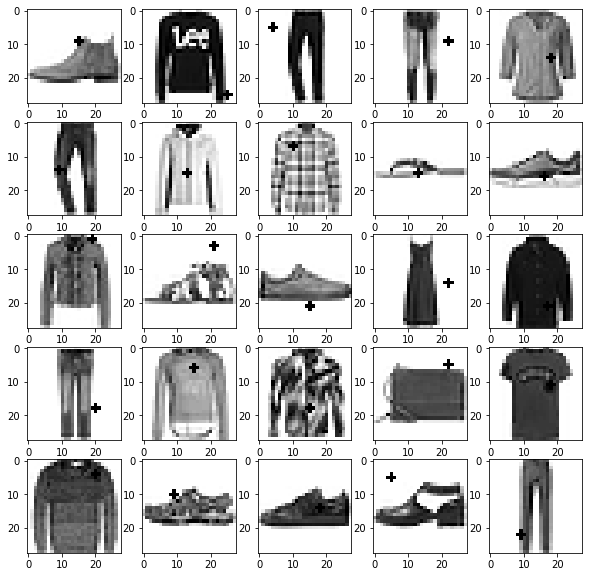

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test_x[i], cmap="binary")

plt.show()

# Normalize

In [ ]:
train_x = train_x / 255.
test_x = test_x / 255.

In [ ]:
train_x = np.reshape(train_x, (-1, 28, 28, 1))
test_x = np.reshape(test_x, (-1, 28, 28, 1))

# 모델 학습

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization

model = Sequential()

model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Dense(2))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(1, (3, 3), activation="sigmoid", padding="same"))



model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=["mape"])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)  


# model.fit에 train_x 두번 넣어줘야함
hist = model.fit(train_x, train_x, epochs=1000, batch_size=1024, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/1000
53/53 [==============================] - 15s 86ms/step - loss: 0.5033 - mape: 107679504.0000 - val_loss: 0.3633 - val_mape: 18185790.0000
Epoch 2/1000
53/53 [==============================] - 4s 74ms/step - loss: 0.3353 - mape: 23678784.0000 - val_loss: 0.3133 - val_mape: 18968572.0000
Epoch 3/1000
53/53 [==============================] - 4s 74ms/step - loss: 0.3110 - mape: 16366336.0000 - val_loss: 0.2995 - val_mape: 13019503.0000
Epoch 4/1000
53/53 [==============================] - 4s 74ms/step - loss: 0.2996 - mape: 13241247.0000 - val_loss: 0.2916 - val_mape: 13668077.0000
Epoch 5/1000
53/53 [==============================] - 4s 74ms/step - loss: 0.2912 - mape: 10973269.0000 - val_loss: 0.2876 - val_mape: 7016946.0000
Epoch 6/1000
53/53 [==============================] - 4s 74ms/step - loss: 0.2848 - mape: 9292787.0000 - val_loss: 0.2856 - val_mape: 11065535.0000
Epoch 7/1000
53/53 [==============================] - 4s 74ms/step - loss: 0.2812 - mape: 8249157.5000 - v

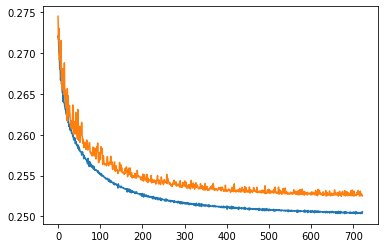

In [ ]:
plt.plot(hist.history['loss'][10:])
plt.plot(hist.history['val_loss'][10:])
plt.show()

# threshold 구하기

In [ ]:
reconstructed = model.predict(train_x)

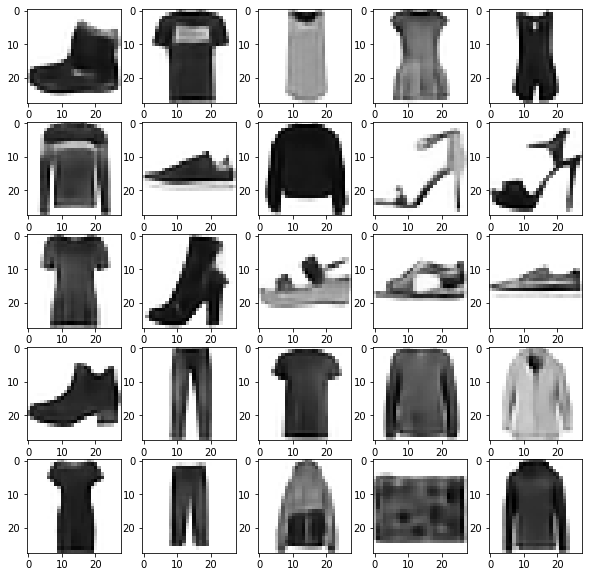

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(reconstructed[i].reshape((28,28)), cmap="binary")

plt.show()

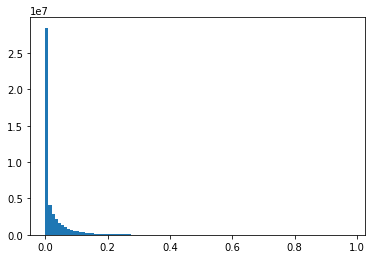

In [ ]:
diff = np.abs(reconstructed - train_x)
plt.hist(diff.flatten(), bins=100)
plt.show()

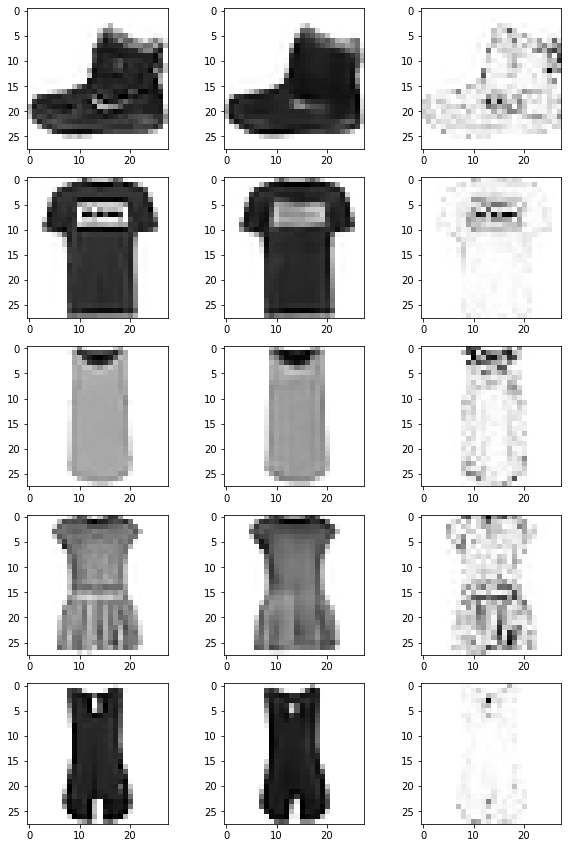

In [ ]:
plt.figure(figsize=(10,15))
for i in range(5):
    plt.subplot(5,3,i*3+1)
    plt.imshow(train_x[i].reshape((28,28)), cmap="binary")
    plt.subplot(5,3,i*3+2)
    plt.imshow(reconstructed[i].reshape((28,28)), cmap="binary")
    plt.subplot(5,3,i*3+3)
    plt.imshow(diff[i].reshape((28,28)), cmap="binary")

plt.show()

In [ ]:
sorted_diff = np.sort(diff.flatten())
threshold_index = int(len(sorted_diff)*0.999)
threshold = sorted_diff[threshold_index]

print(threshold)

0.46374910158269544


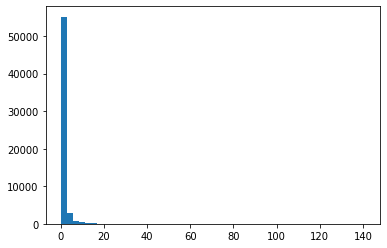

In [ ]:
lage_diff_count = (diff>threshold).sum(axis=(1,2,3))
plt.hist(lage_diff_count, bins=50)
plt.show()

# 탐지 실행

In [ ]:
reconstructed = model.predict(test_x)

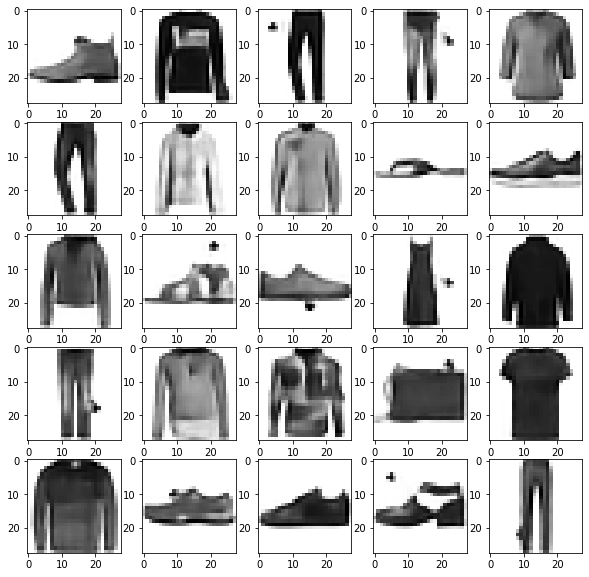

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(reconstructed[i].reshape((28,28)), cmap="binary")

plt.show()

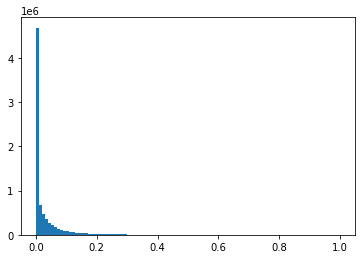

In [ ]:
diff = np.abs(reconstructed - test_x)
plt.hist(diff.flatten(), bins=100)
plt.show()

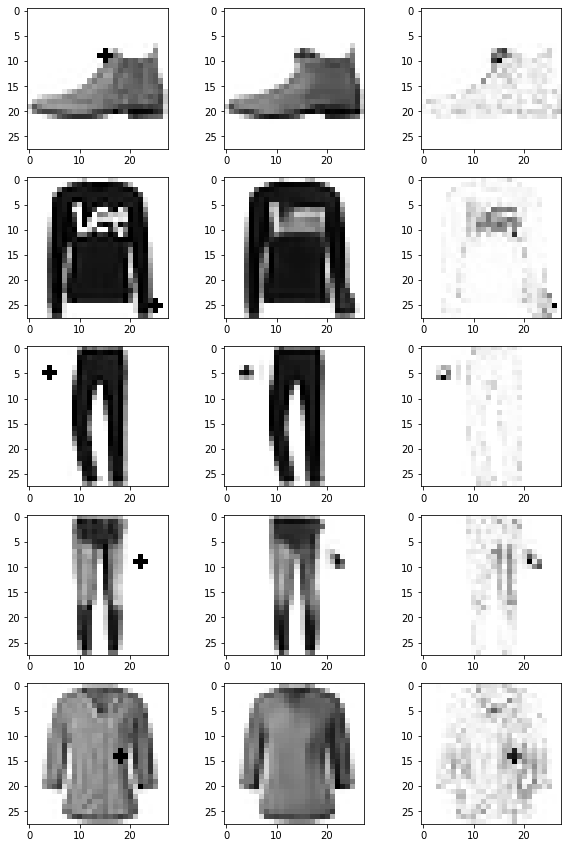

In [ ]:
plt.figure(figsize=(10,15))
for i in range(5):
    plt.subplot(5,3,i*3+1)
    plt.imshow(test_x[i].reshape((28,28)), cmap="binary")
    plt.subplot(5,3,i*3+2)
    plt.imshow(reconstructed[i].reshape((28,28)), cmap="binary")
    plt.subplot(5,3,i*3+3)
    plt.imshow(diff[i].reshape((28,28)), cmap="binary")

plt.show()

diff의 shape : (10000, 28,28,1)  ==>  (10000,)만 남김


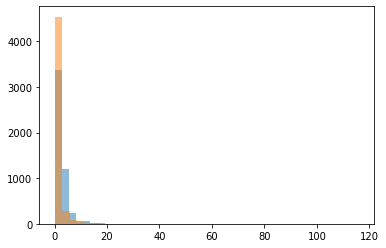

In [ ]:
large_diff_count = (diff>threshold).sum(axis=(1,2,3))


# 앞의 반만 낙서된 그림이므로 정상, 낙서 이미지 나눠줌
half_index = int(len(test_x)*0.5) 
plt.hist(large_diff_count[:half_index], bins=40, alpha=0.5)
plt.hist(large_diff_count[half_index:], bins=40, alpha=0.5)
plt.show()

In [ ]:
predicted = (large_diff_count>0).astype(np.int)
n = len(test_x)
accuracy = (predicted == test_y).sum() / n

print("accuracy=", accuracy)

accuracy= 0.7136
